In [324]:
import pandas as pd
import matplotlib.pyplot as plt

In [344]:
so2 = [60,65,70,80,60,78,100,60,90,90,90,80,70,90,90,70,70,70,60,65,68,70,70,70,70,70,70,75,75,76]
len(so2)

30

In [345]:
data = {'tempo_s':range(0,30),
        'so2': bpm}

df = pd.DataFrame(data,columns=['tempo_s',  'so2'])
df['tempo_s'] =pd.to_datetime(df['tempo_s'],unit='s', origin=pd.Timestamp('2021-05-21'))
df.set_index('tempo_s',inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2021-05-21 00:00:00 to 2021-05-21 00:00:29
Data columns (total 1 columns):
so2    30 non-null int64
dtypes: int64(1)
memory usage: 480.0 bytes


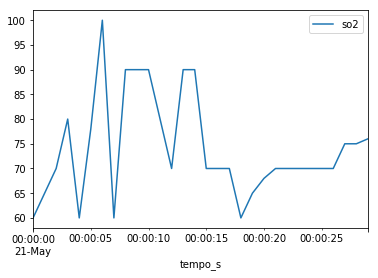

In [346]:
df.plot()
df.info()

In [347]:
df['x1'] = df.so2.shift(10)
df.dropna(axis=0,inplace = True)

In [348]:
df.head()

,so2,x1
tempo_s,,
2021-05-21 00:00:10,90,60.0
2021-05-21 00:00:11,80,65.0
2021-05-21 00:00:12,70,70.0
2021-05-21 00:00:13,90,80.0
2021-05-21 00:00:14,90,60.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-05-21 00:00:10 to 2021-05-21 00:00:29
Data columns (total 2 columns):
so2    20 non-null int64
x1     20 non-null float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


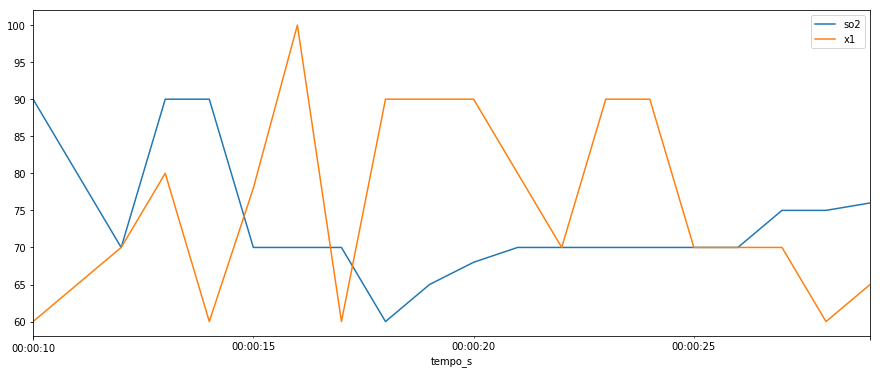

In [349]:
df.plot(figsize=(15,6))
df.info()

In [350]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [351]:
X = df.x1.values
y = df.so2.values

In [352]:
regr = make_pipeline(StandardScaler(), SVR(C=1.5, epsilon=0.6))
regr.fit(X.reshape(-1,1), y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.6,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [353]:
df['ar_1']= regr.predict(X.reshape(-1,1))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-05-21 00:00:10 to 2021-05-21 00:00:29
Data columns (total 2 columns):
so2     20 non-null int64
ar_1    20 non-null float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


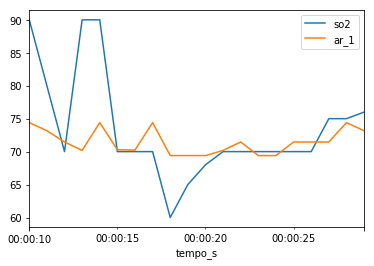

In [354]:
del df['x1']
df.plot()
df.info()

In [355]:
erro = (df.ar_1 - df.so2)**2
erro.mean()

54.272053432292395